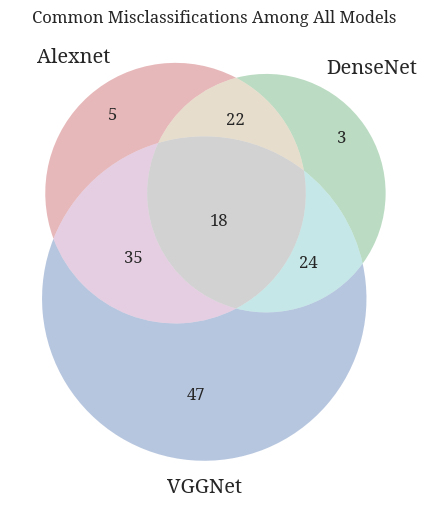

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3

# Load data
data = pd.read_csv('mistakes_list.csv')

# Group misclassified characters by model and create sets
misclassified_by_model = data.groupby('Model')['Actual Character'].apply(set)

# Calculate intersections and unique elements for Venn diagram plotting
model_names = misclassified_by_model.index.tolist()

if len(model_names) == 3:
    intersection12 = misclassified_by_model[model_names[0]].intersection(misclassified_by_model[model_names[1]])
    intersection23 = misclassified_by_model[model_names[1]].intersection(misclassified_by_model[model_names[2]])
    intersection13 = misclassified_by_model[model_names[0]].intersection(misclassified_by_model[model_names[2]])
    # Triple intersection
    intersection123 = misclassified_by_model[model_names[0]].intersection(misclassified_by_model[model_names[1]], misclassified_by_model[model_names[2]])

    # Calculate unique sets
    unique1 = misclassified_by_model[model_names[0]] - (intersection12 | intersection13 | intersection123)
    unique2 = misclassified_by_model[model_names[1]] - (intersection12 | intersection23 | intersection123)
    unique3 = misclassified_by_model[model_names[2]] - (intersection13 | intersection23 | intersection123)

    subsets = (len(unique1), len(unique2), len(intersection12),
               len(unique3), len(intersection13), len(intersection23),
               len(intersection123))

    plt.figure(figsize=(6, 6))
    venn3(subsets=subsets, set_labels=model_names)
    plt.title('Common Misclassifications Among All Models')
    plt.show()
